In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 21 17:13:19 2021

@author: julie
"""

import numpy as np
import pandas as pd
import geopandas as gpd
import geopy
import re
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Methods

#### Unused geopy version

In [5]:
# Not in use - check convert_zips.py

def latlong_to_zip(df, geolocator, lat, lon):    #https://gis.stackexchange.com/questions/352961/convert-lat-lon-to-zip-postal-code-using-python
    """
    This takes in latitude and longitude coordinates and outputs city zipcode using geopy
    arguments: latitude (float), longitude(float)
    returns: Series of location objects (zipcode is a string)
    """
    location = geolocator.reverse((df[lat], df[lon]))
    try:
        return location.raw['address']['postcode']
    except:
        # location.raw['postcode'] == ['     ']    # doesn't work
        # return location.raw['address']['postcode']
        return None
    # return location.raw['address']['postcode']

## Load Crash Data

In [6]:
#%% Read Data

## Read Collision crash_data + column names
crash_data = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv',
                        parse_dates=['CRASH DATE'])

## Add Month and Year Columns
crash_data.loc[:,'MONTH'] = crash_data.loc[:,'CRASH DATE'].dt.month
crash_data.loc[:,'YEAR'] = crash_data.loc[:,'CRASH DATE'].dt.year

## Check Column names
crash_columns = crash_data.columns

## Unused Vehicle data
# vehicle_columns = vehicle_data.columns
# vehicle_data = pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles.csv')
# vehicle_data['CRASH_DATE']    # 09/07/2012 - 07/10/2021
# vehicle_data.shape[0]     #3608515

/Users/julie/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
#%% Find date ranges
crash_data['CRASH DATE']     # 07/05/2012 - 04/14/2021

0         2021-04-14
1         2021-04-13
2         2021-04-15
3         2021-04-13
4         2021-04-12
             ...    
1801412   2012-07-06
1801413   2012-07-03
1801414   2012-07-01
1801415   2012-07-08
1801416   2012-07-05
Name: CRASH DATE, Length: 1801417, dtype: datetime64[ns]

In [8]:
#%% Find number of entries
crash_data.shape[0]     #1801417

#%% Vehicle types
crash_vehicle_types1 = crash_data['VEHICLE TYPE CODE 1'].unique()    #1260 unique types
crash_vehicle_types2 = crash_data['VEHICLE TYPE CODE 2'].unique()     #1381 unique types

#%% Trim data down to bicycle only
crash_bicycle_names = [
    'E-Bike', 
    'Bike', 
    'Scooter', 
    'Dirt Bike', 
    'SCOOTER', 
    'kick scoot', 
    'MOTOR SCOO', 
    'Minibike', 
    'DIRT BIKE', 
    'Minibike'
    ]

### Different Types of bike data

In [9]:

#%% Narrowing data down to bike data

# This data is for BIKE + E-BIKE specific rows
bike_data = crash_data[((crash_data['VEHICLE TYPE CODE 1'] == 'Bike')
                       |
                       (crash_data['VEHICLE TYPE CODE 2'] == 'Bike'))] #(31782, 29), bike_data_or


##### --------------------------------------------------------------------------
##### Selecting for all bike-like vehicles - UNUSED
# bike_data_any = crash_data[crash_data['VEHICLE TYPE CODE 1'].isin(crash_bicycle_names)] #(11397, 29)

# bike_data_any_or = crash_data[((crash_data['VEHICLE TYPE CODE 1'].isin(crash_bicycle_names))
#                        |
#                        (crash_data['VEHICLE TYPE CODE 2'].isin(crash_bicycle_names)))] #(34532, 29)
# bike_data_any_and = crash_data[((crash_data['VEHICLE TYPE CODE 1'].isin(crash_bicycle_names))
#                        &
#                        (crash_data['VEHICLE TYPE CODE 2'].isin(crash_bicycle_names)))] #(470, 29) saved as bike_on_bike...

##### ---------------------------------------------------------------------------
##### Check for duplicates in above:
#bike_data_or['COLLISION_ID'].duplicated().sum()     #Is 0

# Just 'bike'
bike_data_1 = crash_data[crash_data['VEHICLE TYPE CODE 1'] == 'Bike'] #(10382, 29)
bike_data_2 = crash_data[crash_data['VEHICLE TYPE CODE 2'] == 'Bike'] #(34532, 29)

# Multi-bike accident
bike_data_and = crash_data[((crash_data['VEHICLE TYPE CODE 1'] == 'Bike') #418, saved as bike_data_bike_on_bike
                       &
                       (crash_data['VEHICLE TYPE CODE 2'] == 'Bike'))] 


In [10]:
### Just Bike Data:  with E-bikes removed, 31751 (31782 before)
 
bike_data = crash_data[((crash_data['VEHICLE TYPE CODE 1'] == 'Bike')
                       |
                       (crash_data['VEHICLE TYPE CODE 2'] == 'Bike'))] #(31782, 29/31), bike_data_or
print(bike_data.shape)
bike_data.reset_index(inplace=True)
remove_indexes = bike_data[(bike_data['VEHICLE TYPE CODE 1'] == 'E-Bike') | (bike_data['VEHICLE TYPE CODE 2'] == 'E-Bike')].index
bike_data.drop(remove_indexes, inplace=True)

(31782, 31)


/Users/julie/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [287]:
# #%%% DONT USE THIS!!! Convert latitude and longitude to zipcode
# ## Create geocoder
# geolocator = geopy.Nominatim(user_agent = "bike_accidents")
# clean_bike_data = bike_data_or[['LATITUDE', 'LONGITUDE', 'COLLISION_ID']].dropna()  #29465 without NA, 31782 with

# ## retrieve zipcode
# addresses = clean_bike_data.apply(latlong_to_zip, axis=1, geolocator=geolocator, lat = 'LATITUDE', lon = 'LONGITUDE')


## Group by month/year and plot Accident Counts




In [11]:
bike_data.columns

Index(['index', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'MONTH', 'YEAR'],
      dtype='object')

In [315]:
df_

,YEAR,MONTH,Accident Count,Date
0,2012,9,1,2012-09-01
1,2012,11,1,2012-11-01
2,2013,3,1,2013-03-01
3,2013,8,1,2013-08-01
4,2013,11,1,2013-11-01
...,...,...,...,...
73,2021,3,302,2021-03-01
74,2021,4,368,2021-04-01
75,2021,5,532,2021-05-01
76,2021,6,569,2021-06-01


In [318]:
df_plot

,YEAR,MONTH,Accident Count,Date
13,2016,3,272,2016-03-01
14,2016,4,483,2016-04-01
15,2016,5,620,2016-05-01
16,2016,6,759,2016-06-01
17,2016,7,726,2016-07-01
...,...,...,...,...
73,2021,3,302,2021-03-01
74,2021,4,368,2021-04-01
75,2021,5,532,2021-05-01
76,2021,6,569,2021-06-01


In [338]:
df_plot['Date']

11   2016-01-01
12   2016-02-01
13   2016-03-01
14   2016-04-01
15   2016-05-01
        ...    
73   2021-03-01
74   2021-04-01
75   2021-05-01
76   2021-06-01
77   2021-07-01
Name: Date, Length: 67, dtype: datetime64[ns]

In [337]:
df_plot['Date'].dtype

dtype('<M8[ns]')

In [13]:
## Create new column called Accident Count and set all values 1
bike_data_or_trimmed.columns
bike_data_or_trimmed["Accident Count"] = 1
# Create Date column that combines YEAR and MONTH
bike_data_or_trimmed['Date'] = pd.to_datetime(bike_data_or_trimmed[['YEAR', 'MONTH']].assign(Day=1))

## Aggregate by month and year and count accidents
df_  = bike_data_or_trimmed.groupby(['YEAR','MONTH']).agg({"Accident Count":"sum"}).reset_index()
df_['Date'] = pd.to_datetime(df_[['YEAR', 'MONTH']].assign(Day=1))
df_plot = df_[(df_['Date'] > '2016-03-01') & (df_['Date'] < '2021-01-01')]
# Create lineplot
# fig,axs = plt.subplot(figsize=(45,30))
# fig, ax = plt.plot(figsize=(45,30))
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=df_plot, ax=ax, x="Date", y="Accident Count", color='blue')

NameError: name 'bike_data_or_trimmed' is not defined

### Average over time by Borough

In [12]:
bike_data_borough = bike_data[['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED','MONTH', 'YEAR', 'Accident Count', 'Date']]

KeyError: "['Accident Count', 'Date'] not in index"

In [417]:
bike_data_borough['LONGITUDE'].dropna
bike_data_borough.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,MONTH,YEAR,Accident Count,Date
0,2021-04-16,11:00,QUEENS,11368.0,40.749580,-73.865410,1,0,4,2021,1,2021-04-01
1,2021-04-14,0:00,NaN,NaN,40.601864,-74.002320,1,0,4,2021,1,2021-04-01
2,2021-04-14,20:10,BROOKLYN,11238.0,40.688210,-73.965830,0,0,4,2021,1,2021-04-01
3,2021-04-13,17:55,BRONX,10452.0,40.844105,-73.923065,1,0,4,2021,1,2021-04-01
4,2021-04-14,19:45,BROOKLYN,11201.0,40.694840,-73.983910,1,0,4,2021,1,2021-04-01


In [1]:
bike_data_borough.columns

NameError: name 'bike_data_borough' is not defined

In [ ]:
bike_data_2020 = bike_data_borough[[]]

In [421]:
## Create new column called Accident Count and set all values 1
bike_data_borough["Accident Count"] = 1
bike_data_borough["Fatality Count"] = 1

# import zipcode shapes
zip_codes = gpd.read_file('ZIP_CODE')

/Users/julie/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [424]:
zip_codes['density'] = zip_codes['POPULATION']/zip_codes['AREA']

In [427]:
zip_codes.to_crs("EPSG:4326",inplace=True)

In [428]:
zip_codes

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,density
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",0.000823
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.93740 40.67973, -73.93487 40.679...",0.002107
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.90294 40.67084, -73.90223 40.668...",0.001998
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.95797 40.67066, -73.95576 40.670...",0.002385
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97208 40.65060, -73.97192 40.650...",0.001960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.12065 40.64104, -74.12057 40.641...",0.000468
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.84076 40.62536, -73.84306 40.627...",0.003160
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",0.001603
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.95133 40.76931, -73.95165 40.769...",0.000000


In [430]:
from geopandas.tools import sjoin
accidents_w_zips = sjoin(bike_data_borough, zip_codes, how = 'left')

ValueError: 'left_df' should be GeoDataFrame, got <class 'pandas.core.frame.DataFrame'>

In [14]:
all_data = bike_data.copy()
all_data["Accident Count"] = 1
all_data = all_data[['CRASH DATE', 'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','Date']]
all_data['Count'] = 1
all_data['Date'] = pd.to_datetime(bike_data_yearly[['YEAR', 'MONTH']].assign(Day=1))

# data_yr = data_yr.dropna(subset=['BOROUGH'])
# data_yr['Count'] = 1
# data_yr['Date'] = pd.to_datetime(data_yr[['YEAR', 'MONTH']].assign(Day=1))
# df_yearly = bike_data_yearly.groupby(["YEAR"]).agg({"Accident Count":"sum"})
# df_yearly['Date'] = pbd.to_datetime(bike_data_yearly[['YEAR', 'MONTH']].assign(Day=1))
# df_yearly = df_yearly[df_yearly.index.isin([2016, 2017, 2018, 2019, 2020])]
# df_yearly["Accident Count per Month"] = df_yearly["Accident Count"]/12
# df_yearly["Accident Count per Month"] = df_yearly["Accident Count per Month"].round(2)

# fig, ax = plt.subplots(figsize=(8,8))
# sns.lineplot(data=df_yearly, ax=ax, x="YEAR", y="Accident Count per Month", color='green')
# # g = sns.lineplot(data=df_yearly.loc[2016:2020], x="Date", y="Accident Count")

KeyError: "['Date'] not in index"

/Users/julie/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


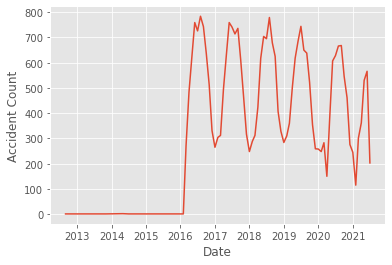

In [289]:
## Create new column called Accident Count and set all values 1
bike_data["Accident Count"] = 1
# Create Date column that combines YEAR and MONTH
bike_data['Date'] = pd.to_datetime(bike_data[['YEAR', 'MONTH']].assign(Day=1))

## Aggregate by month and year and count accidents
df_  = bike_data.groupby(['YEAR','MONTH']).agg({"Accident Count":"sum"}).reset_index()
df_['Date'] = pd.to_datetime(df_[['YEAR', 'MONTH']].assign(Day=1))

# Create lineplot
g = sns.lineplot(data=df_, x="Date", y="Accident Count")

### Yearly average

In [351]:
df_yearly

,Accident Count,Date
YEAR,,
2012,2,2021-01-01
2013,3,2021-01-01
2014,4,2021-01-01
2015,3,2021-01-01
2016,5871,2021-01-01
2017,6342,2020-12-01
2018,6106,2021-01-01
2019,5927,2021-01-01
2020,5171,2020-12-01


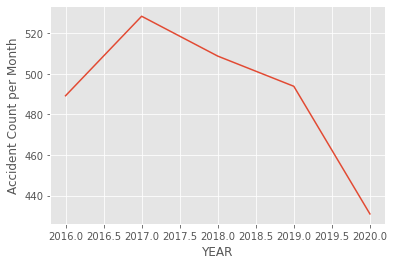

In [402]:
data_yr = bike_data.copy()
data_yr["Accident Count"] = 1
data_yr = data_yr.dropna(subset=['BOROUGH'])
data_yr['Count'] = 1
data_yr['Date'] = pd.to_datetime(data_yr[['YEAR', 'MONTH']].assign(Day=1))
df_yearly = bike_data_yearly.groupby(["YEAR"]).agg({"Accident Count":"sum"})
df_yearly['Date'] = pd.to_datetime(bike_data_yearly[['YEAR', 'MONTH']].assign(Day=1))
df_yearly = df_yearly[df_yearly.index.isin([2016, 2017, 2018, 2019, 2020])]
df_yearly["Accident Count per Month"] = df_yearly["Accident Count"]/12
df_yearly["Accident Count per Month"] = df_yearly["Accident Count per Month"].round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=df_yearly, ax=ax, x="YEAR", y="Accident Count per Month", color='green')
# g = sns.lineplot(data=df_yearly.loc[2016:2020], x="Date", y="Accident Count")

<AxesSubplot:xlabel='YEAR', ylabel='Accident Count per Month'>

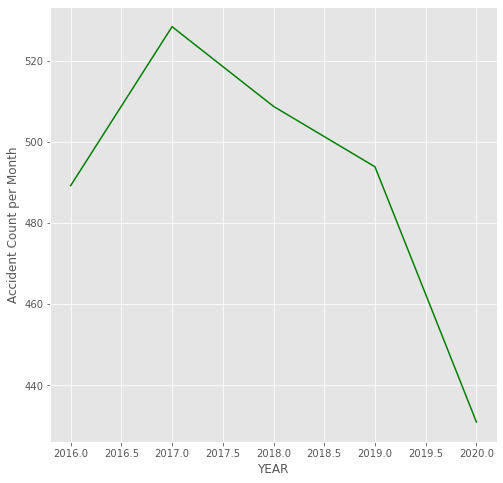

In [449]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=df_yearly, ax=ax, x="YEAR", y="Accident Count per Month", color='green')

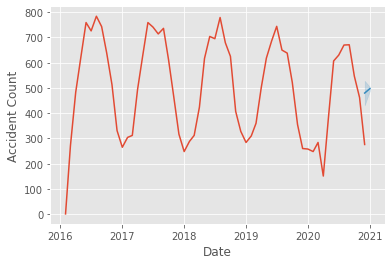

In [401]:
fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

g1 = sns.lineplot(data=df_plot, x="Date", y="Accident Count", ax=ax1)
g2 = sns.lineplot(data=df_yearly, x="Date", y="Accident Count per Month", ax=ax1)


# sns.lineplot(ax = ax, data=df_yearly.loc[2016:2020], x="Date", y="Accident Count")
# df_plot = df_[(df_['Date'] > '2016-03-01') & (df_['Date'] < '2021-01-01')]


### Combine plots


<AxesSubplot:xlabel='Date', ylabel='Accident Count'>

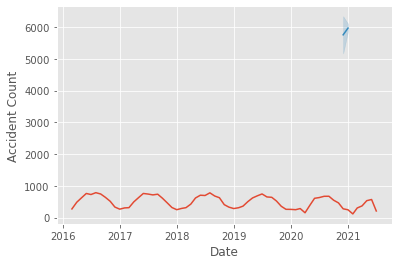

In [321]:
ax = sns.lineplot(data=df_plot, x="Date", y="Accident Count")
sns.lineplot(data=df_yearly.loc[2016:2020], x="Date", y="Accident Count")

### Deaths

### By Borough - START HERE!!!!!!!

In [309]:
#%% By borough - DO THIS, separate accidents by borough
data_by_borough = bike_data[['BOROUGH', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'ZIP CODE', 'NUMBER OF PERSONS KILLED']]
data_by_borough = data_by_borough.dropna(subset=['BOROUGH'])
data_by_borough['Count'] = 1
# data_by_borough.sort_values(by='BOROUGH', inplace=True)
df_borough = data_by_borough.groupby([]"BOROUGH"])
b = sns.catplot(data=df_borough, kind="bar", x="BOROUGH", y="Count")
df_borough

AttributeError: 'DataFrameGroupBy' object has no attribute 'get'

### E-Bike

/Users/julie/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


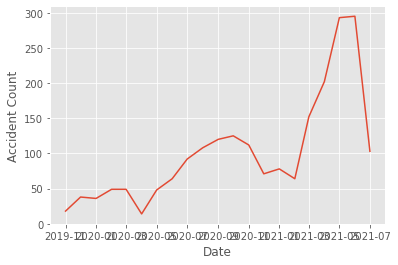

In [252]:
### E-Bike data - DO THIS, separate accidents by e-bike
ebike_data = crash_data[(crash_data['VEHICLE TYPE CODE 1'] == 'E-Bike') | (crash_data['VEHICLE TYPE CODE 2'] == 'E-Bike')]

# crash_data.shape     #Shape is (1 801 417, 29)
ebike_data.shape     #(2131, 31)

##### -------------------------------------------------------------------
## Create new column called Accident Count and set all values 1
ebike_data["Accident Count"] = 1
# Create Date column that combines YEAR and MONTH
ebike_data['Date'] = pd.to_datetime(ebike_data[['YEAR', 'MONTH']].assign(Day=1))

## Aggregate by month and year and count accidents
df_ebike  = ebike_data.groupby(['YEAR','MONTH']).agg({"Accident Count":"sum"}).reset_index()
df_ebike['Date'] = pd.to_datetime(df_ebike[['YEAR', 'MONTH']].assign(Day=1))

# Create lineplot

fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=df_ebike, ax=ax, x="Date", y="Accident Count", color='red')

<AxesSubplot:xlabel='Date', ylabel='Accident Count'>

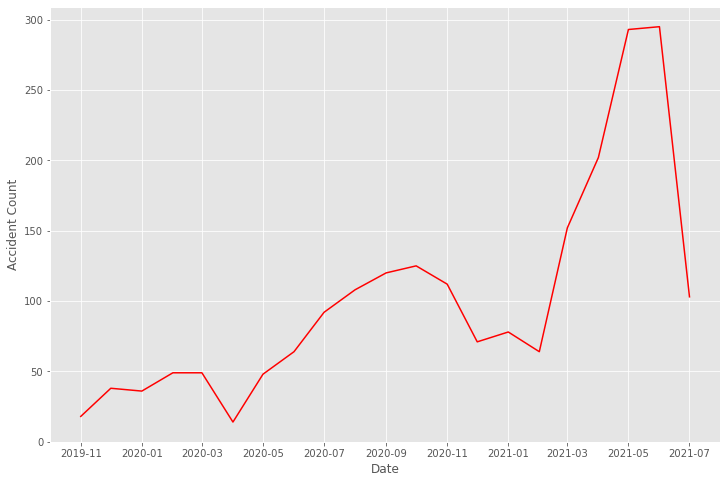

In [453]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df_ebike, ax=ax, x="Date", y="Accident Count", color='red')

### EXTRA

In [ ]:

#%% Load Geopandas shape file
bike_lanes_2021 = gpd.read_file('Bicycle Routes 2021/')


#%% temp test
# addresses = addresses.str.slice(stop=5)
# addresses = addresses.astype('string')
print(addresses.values.dtype)
# tmp_series = addresses.dtype
# print(tmp_series)
# tmp_series2 = (addresses.dtype != 'str')
# print(tmp_series2)


for i in addresses:
    # print(type(i))
    print(i, end="\n")
    if type(i) != str:
        print(i)
        print(type(i))
        
    # if type(i) == str: 
    #     # print('string')       
    #     print(re.findall(r"\D(\d{5})\D", i))
    # else:
    #     pass

#%%